## Coursera Final Capstone: Toronto Neighborhoud Clustering and Resturant Supply Chain Positioning

### Introduction

Restaurants are usually located at the last part of a very long supply chain, consisting of various vendors. This chain usually begins with raw material producers such as farms,then connects to intermediaries such as logistics and distribution companies, and ultimately to restaurants. One of the most crucial challenges of food supply distributors is to locate the best urban spot which is close enough to the targeted restaurants and is far enough from the neighborhoods with higher land values. There are many other factors such as closeness to highways and train stations, presence of particular municipal regulations and the intrinsic structure of the logistic facilities, which are in part influencing the final decision for locating the distribution facilities. 

In this mini project, I would try to find the optimum location for the final dispatching station by clustering neighborhoods based on particular type of the restaurant. For this reason, I will use the foursquare's API endpoints to assign the most frequent type of the restaurant to each neighborhood. Then, by means of the Kmeans clustering method, I will recommend the best neighborhoods to locate the distribution stations for each type of resturants supply providers.

At the end, we will have a ranked list of neighborhoods based on approximity to a particular type of the resturants. This list also can be used as a guide for tourists who are interested in a specific type of foods and cuisines for planning and accomodation purposes. Also entrepreneurs can benefit from knowing neighborhoods with higher density of each type of resturants. They can plan to establish their own resturant, or provide specific services.

# Table of Contents: 

* [Data](#Data)
* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)

-----

## Data

Two sets of data are required for this analysis. First, the neighbourhood and borough information for Toronto is scraped from Wikipedia. Second, an API call is used to get the top "Food" recommendations for each neighbourhood.

----------

## Methodology

To cluster the neighborhoods based on the intensity of special type of resturants, a Kmeans clustering algorithm has been used. Kmeans is a method of vector quantization to cluster the points of data based on the distance from centroids. 
To popluate the features, first, using the "explore" endpoint from Foursquare API, we create a list of ranked resturant type for each neighobrhood. Then by doing one-hot coding, a vector space consisting of standardize values for each neighberhood is created. The final matrix is used to cluster the observations.

## Conclusion

The final map clearly shows the clustered neighborhood based on the intensity of resturant types. This map then can be used as an input to a multiple criteria decision making process along with other factors to decide on the best location for distrubution centers. 
This study is largly limited to the possible venue suggestions from Foursquare website. The quality and quantity of the features can be increased by using the premium account. The clusters are also largly influenced by the K values and other parameters. To get the best results, results from other clustering methods could be compared and the most accurate clustering methods selected. Since the positioning of the vectors could be so diverse, a density based clustering method

-------

### Getting Toronto neighborhoud list by scraping "List of postal codes of Canada" from Wikipedia, usinh BeautifulSoup

First, let's import the needed modules

In [33]:
from bs4 import BeautifulSoup as bs
import requests as rq
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Request module has been used to get the body of Wikipedia HTML file as Text. BeautifulSoup Module is used to parse the HTML.

In [34]:
source = rq.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = bs(source, 'lxml')

-----

The table consisting of the Postcode is selected this table is of 'wikitable sortable' class.

In [35]:
table = soup.find_all('table', {'class':'wikitable sortable'})

Next, tags containing the postcode, borough, and neighborhoud is captured and appended to datafarame.

In [36]:
full = pd.DataFrame(columns = ["Postcode", "Borough", "Neighborhood"])
for index, row in enumerate(soup.find('table', {'class':'wikitable sortable'}).find_all('tr')):
#     print(index, row)
    data = row.find_all(['td'])
    try:
        Postcode = data[0].text
        Borough = data[1].text
        Neighbourhood = data[2].text.strip('\n')
        cells = [Postcode, Borough,Neighbourhood]
        full.loc[index] = cells
        
    except IndexError:pass
full = full.loc[full['Borough'] != 'Not assigned']    


Rows from the extracted table grouped into a new dataframe. Neighbourhood sharing same Postcode have joined together. 

In [37]:
full_grouped = full.groupby(['Postcode', "Borough"])[["Neighborhood"]].agg(lambda col: ', '.join(col))\
.sort_values('Postcode').reset_index()

In [38]:
full_grouped

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [39]:
full_grouped = full_grouped[:100]

-------

## Adding Long-Lat for Postal Codes

In [40]:
codes = pd.read_csv('/Users/newcomputer/Projects/Coursera/Geospatial_Coordinates.csv')

In [41]:
codes.rename(columns={"Postal Code": "Postcode"}, inplace = True)

In [42]:
toronto_data = pd.merge(full_grouped, codes, on ='Postcode')

In [43]:
toronto_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [44]:
toronto_data['Neighborhood'].nunique()

100

## Populating the Map

Adding neighborhood on top of the map

In [45]:
import requests
import numpy as np
from sklearn.cluster import KMeans


In [46]:

latitude = 43.6532
longitude = -79.3832
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6532, -79.3832.


In [47]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], \
                                           toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [48]:
CLIENT_ID = 'J1CT2BCEGDHXVWLBN1FUQQ3PUWJCVDDNOLDOOAQXOFZTU4LS' # your Foursquare ID
CLIENT_SECRET = 'QIWKCC22EZM5MJPX15WIGVK01IEOFFNRRKON2DIG35U0TUHV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J1CT2BCEGDHXVWLBN1FUQQ3PUWJCVDDNOLDOOAQXOFZTU4LS
CLIENT_SECRET:QIWKCC22EZM5MJPX15WIGVK01IEOFFNRRKON2DIG35U0TUHV


In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=30, section = 'food'):
   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                 )




Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The D

In [51]:
print(toronto_venues.shape)
toronto_venues.head()

(1017, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Meena's Fine Foods,43.804476,-79.199753,Indian Restaurant
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,China Gourmet king,43.764849,-79.191642,Chinese Restaurant
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Doug's Bakery,43.762400,-79.192285,Bakery


In [52]:
toronto_venues.groupby('Neighborhood').count().reset_index()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Adelaide, King, Richmond",30,30,30,30,30,30
1,Agincourt,4,4,4,4,4,4
2,"Alderwood, Long Branch",4,4,4,4,4,4
3,"Bathurst Manor, Downsview North, Wilson Heights",9,9,9,9,9,9
4,Bayview Village,4,4,4,4,4,4
5,"Bedford Park, Lawrence Manor East",21,21,21,21,21,21
6,Berczy Park,30,30,30,30,30,30
7,"Birch Cliff, Cliffside West",2,2,2,2,2,2
8,"Bloordale Gardens, Eringate, Markland Wood, Ol...",3,3,3,3,3,3
9,"Brockton, Exhibition Place, Parkdale Village",15,15,15,15,15,15


In [53]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 83 uniques categories.


## Analyze Each Neighborhood


In [54]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="", dummy_na=True)
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,nan
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
toronto_onehot[toronto_onehot['nan'] == 1]

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,nan


In [56]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,nan
0,"Adelaide, King, Richmond",0.100000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.033333,0.033333,0.0,0.100000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.100000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.0
1,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,"Alderwood, Long Branch",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00

In [57]:
num_top_venues = 20

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                            venue  freq
0             American Restaurant  0.10
1                      Steakhouse  0.10
2                            Café  0.10
3                Asian Restaurant  0.07
4                       Gastropub  0.07
5                     Pizza Place  0.07
6                  Breakfast Spot  0.07
7                Sushi Restaurant  0.03
8                Greek Restaurant  0.03
9                    Noodle House  0.03
10                     Food Court  0.03
11                     Restaurant  0.03
12                    Salad Place  0.03
13             Seafood Restaurant  0.03
14                  Deli / Bodega  0.03
15            Japanese Restaurant  0.03
16           Brazilian Restaurant  0.03
17                  Burrito Place  0.03
18                   Burger Joint  0.03
19  Vegetarian / Vegan Restaurant  0.03


----Agincourt----
                              venue  freq
0                 Korean Restaurant  0.25
1                    Sa

                              venue  freq
0              Fast Food Restaurant   1.0
1               American Restaurant   0.0
2         Middle Eastern Restaurant   0.0
3                       Pizza Place   0.0
4                Persian Restaurant   0.0
5            Peking Duck Restaurant   0.0
6                      Noodle House   0.0
7           New American Restaurant   0.0
8   Molecular Gastronomy Restaurant   0.0
9        Modern European Restaurant   0.0
10               Mexican Restaurant   0.0
11            Indonesian Restaurant   0.0
12         Mediterranean Restaurant   0.0
13                 Malay Restaurant   0.0
14               Mac & Cheese Joint   0.0
15        Latin American Restaurant   0.0
16                Korean Restaurant   0.0
17                Jewish Restaurant   0.0
18              Japanese Restaurant   0.0
19               Italian Restaurant   0.0


----Canada Post Gateway Processing Centre----
                              venue  freq
0               American Res

                      venue  freq
0               Pizza Place  0.13
1            Sandwich Place  0.10
2                      Café  0.10
3       American Restaurant  0.07
4           Thai Restaurant  0.07
5          Sushi Restaurant  0.07
6        Seafood Restaurant  0.07
7        Italian Restaurant  0.07
8        Chinese Restaurant  0.03
9                Restaurant  0.03
10  New American Restaurant  0.03
11         Greek Restaurant  0.03
12        French Restaurant  0.03
13                    Diner  0.03
14  Comfort Food Restaurant  0.03
15        Indian Restaurant  0.03
16             Burger Joint  0.03
17         Asian Restaurant  0.03
18       Persian Restaurant  0.00
19         Ramen Restaurant  0.00


----Davisville North----
                              venue  freq
0                        Restaurant  0.17
1                    Breakfast Spot  0.17
2                       Pizza Place  0.17
3                    Sandwich Place  0.17
4                      Burger Joint  0.17
5      

                              venue  freq
0              Fast Food Restaurant  0.23
1                  Asian Restaurant  0.12
2                        Restaurant  0.12
3                        Food Court  0.08
4                            Bakery  0.08
5               American Restaurant  0.04
6                     Burrito Place  0.04
7                  Greek Restaurant  0.04
8                    Sandwich Place  0.04
9                     Deli / Bodega  0.04
10                      Snack Place  0.04
11               Chinese Restaurant  0.04
12              Japanese Restaurant  0.04
13                      Wings Joint  0.04
14                     Burger Joint  0.04
15                       Taco Place  0.00
16            Vietnamese Restaurant  0.00
17                     Noodle House  0.00
18          New American Restaurant  0.00
19  Molecular Gastronomy Restaurant  0.00


----First Canadian Place, Underground city----
                      venue  freq
0                      Café  0.17
1

                              venue  freq
0                     Deli / Bodega   0.5
1                    Breakfast Spot   0.5
2         Middle Eastern Restaurant   0.0
3                        Poke Place   0.0
4                       Pizza Place   0.0
5                Persian Restaurant   0.0
6            Peking Duck Restaurant   0.0
7                      Noodle House   0.0
8           New American Restaurant   0.0
9   Molecular Gastronomy Restaurant   0.0
10       Modern European Restaurant   0.0
11               Mexican Restaurant   0.0
12                    Poutine Place   0.0
13         Mediterranean Restaurant   0.0
14                 Malay Restaurant   0.0
15               Mac & Cheese Joint   0.0
16        Latin American Restaurant   0.0
17                Korean Restaurant   0.0
18                Jewish Restaurant   0.0
19              Japanese Restaurant   0.0


----Humber Summit----
                              venue  freq
0                       Pizza Place  0.33
1         

                              venue  freq
0                              Café  0.12
1                             Diner  0.12
2                Italian Restaurant  0.12
3                        Bagel Shop  0.12
4                    Sandwich Place  0.12
5              Fast Food Restaurant  0.12
6                Mexican Restaurant  0.12
7                Chinese Restaurant  0.12
8               American Restaurant  0.00
9                       Pizza Place  0.00
10               Persian Restaurant  0.00
11           Peking Duck Restaurant  0.00
12                     Noodle House  0.00
13  Molecular Gastronomy Restaurant  0.00
14          New American Restaurant  0.00
15            Portuguese Restaurant  0.00
16       Modern European Restaurant  0.00
17        Middle Eastern Restaurant  0.00
18         Mediterranean Restaurant  0.00
19                 Malay Restaurant  0.00


----Northwood Park, York University----
                              venue  freq
0       Eastern European Restauran

                      venue  freq
0                      Café  0.13
1        Italian Restaurant  0.10
2                Restaurant  0.10
3                  Creperie  0.07
4                    Bakery  0.07
5        Seafood Restaurant  0.07
6           Thai Restaurant  0.03
7             Deli / Bodega  0.03
8                Steakhouse  0.03
9   Comfort Food Restaurant  0.03
10                Gastropub  0.03
11               Food Truck  0.03
12                    Diner  0.03
13           Breakfast Spot  0.03
14      Japanese Restaurant  0.03
15                   Bistro  0.03
16       Belgian Restaurant  0.03
17               Bagel Shop  0.03
18                BBQ Joint  0.03
19        French Restaurant  0.03


----Studio District----
                         venue  freq
0                         Café  0.19
1           Italian Restaurant  0.12
2                       Bakery  0.12
3                    Gastropub  0.08
4      Comfort Food Restaurant  0.08
5          American Restaurant  0.08
6

                              venue  freq
0                 Indian Restaurant  0.33
1                Mexican Restaurant  0.33
2                 Korean Restaurant  0.33
3                       Pizza Place  0.00
4                Persian Restaurant  0.00
5            Peking Duck Restaurant  0.00
6                      Noodle House  0.00
7           New American Restaurant  0.00
8   Molecular Gastronomy Restaurant  0.00
9        Modern European Restaurant  0.00
10        Middle Eastern Restaurant  0.00
11         Mediterranean Restaurant  0.00
12                 Arepa Restaurant  0.00
13                 Malay Restaurant  0.00
14               Mac & Cheese Joint  0.00
15        Latin American Restaurant  0.00
16                Jewish Restaurant  0.00
17              Japanese Restaurant  0.00
18               Italian Restaurant  0.00
19                        Irish Pub  0.00


----Woodbine Gardens, Parkview Hill----
                              venue  freq
0                       Pizza Plac

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [71]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :],\
                                                                          num_top_venues)

neighborhoods_venues_sorted.sort_index()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",American Restaurant,Steakhouse,Café,Pizza Place,Breakfast Spot
1,Agincourt,Breakfast Spot,Chinese Restaurant,Korean Restaurant,Sandwich Place,Filipino Restaurant
2,"Alderwood, Long Branch",Pizza Place,Burger Joint,Sandwich Place,Deli / Bodega,Dim Sum Restaurant
3,"Bathurst Manor, Downsview North, Wilson Heights",Pizza Place,Fried Chicken Joint,Deli / Bodega,Chinese Restaurant,Diner
4,Bayview Village,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Café,nan
5,"Bedford Park, Lawrence Manor East",Pizza Place,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Sushi Restaurant
6,Berczy Park,Bakery,Restaurant,Italian Restaurant,Sushi Restaurant,Steakhouse
7,"Birch Cliff, Cliffside West",Café,Pizza Place,nan,Fast Food Restaurant,Dim Sum Restaurant
8,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Pizza Place,Café,Mediterranean Restaurant,nan,Dim Sum Restaurant
9,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Restaurant,Vietnamese Restaurant,Italian Restaurant


##  Cluster Neighborhoods

In [60]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn import metrics


# labels = DBSCAN(eps=eps, min_samples=minpts, metric='euclidean').fit_predict(X)

# toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
# X = StandardScaler().fit_transform(toronto_grouped_clustering)

# clustering = DBSCAN(eps=10, min_samples=1).fit(X)

# clustering.labels_[0:50] 

In [62]:
# set number of clusters
from sklearn.preprocessing import StandardScaler
kclusters = 25

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
X = StandardScaler().fit_transform(toronto_grouped_clustering)



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([14,  0, 12, 15,  0, 18,  1,  0,  0,  0,  0,  0,  6,  3, 12, 15,  8,
       20,  7, 15, 21, 23, 12, 12,  0,  2, 18, 12, 15, 24,  2, 22, 23,  0,
       16, 23,  0, 23, 23,  0,  2,  0,  0,  0,  0, 12,  3,  0,  5, 12,  0,
        0, 22,  0, 12, 12, 15,  0, 19,  4, 23, 15, 22, 15,  9, 21,  0, 12,
       22, 23, 10, 18,  0,  0, 18,  1, 18, 17,  0, 15, 18,  0, 12, 13, 15,
       11,  0,  0,  0, 15], dtype=int32)

In [63]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

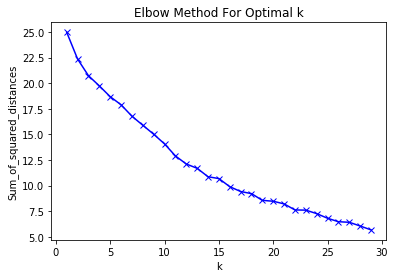

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
toronto_merged.shape

(81, 5)

In [78]:
toronto_merged = toronto_grouped.merge(toronto_data, how='left')


In [79]:
toronto_merged.shape

(90, 89)

In [80]:

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,nan,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",0.1,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.033333,0.066667,0.033333,0.033333,0.0,0.10,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.066667,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.033333,0.033333,0.000000,0.033333,0.0,0.0,0.0,0.1,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,M5H,Downtown Toronto,43.650571,-79.384568,14,American Restaurant,Steakhouse,Café,Pizza Place,Breakfast Spot
1,Agincourt,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,M1S,Scarborough,43.794200,-79.262029,0,Breakfast Spot,Chinese Restaurant,Korean Restaurant,Sandwich Place,Filipino Restaurant
2,"Alderwood, Long Branch",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,M8W,Etobicoke,43.602414,-79.543484,12,Pizza Place,Burger Joint,Sandwich Place,Deli / Bodega,Dim Sum Restaurant
3,"Bathurst Manor, Downsview North, Wilson Heights",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000,0.111111,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,M3H,North York,43.754328,-79.442259,15,Pizza Place,Fried Chicken Joint,Deli / Bodega,Chinese Restaurant,Diner
4,Bayview Village,0.0,0.

In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], \
                                  toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters